<a href="https://colab.research.google.com/github/AbhishekAA002/Machine-Learning/blob/main/walmart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly sales prediction for Wallmart using different models and comapring them

---------------------

## Problem Statement

- We have the sales data for 45 different wallmart stores and we are trying to predict the weekly sales of different stores based on variables such as store number, date, temperature, fuel price, unemployment rate etc.
- We have used all the different regression machine learning techniques and used the best model along with its hyperparameter tuning for the prediction.
- A demo for deployment by taking user-input is also shown in the end of the project for future prediction using the model

--------------------

# Objective
 - Understand the dataset and features
 - Use suitable Data Preprocessing and Feature Selection/Engineering Methods
 - Fine tune the model and hyper parameters and Finalise the Model
 - Make the model deployment-ready by giving User-Input provision

# Approach
 - Importing all libraries which we needed.
 - Perform data preprocessing technique to get balanced structured data.
 - Perform statistical data analysis and derive valuable inference.
 - Perform exploratory data analysis and derive valuable inference.
 - Visualizing things with some plot and derive valuable inference.
 - Train and test through Various different models.
 - Choose the best model
 - Perform hyperparameter tuining
 - Make predictions based on the best model

## Sections

1. Importing libraries
2. Loading the dataset
3. Data exploration
4. Data Visualization
5. Feature Engineering
6. Modelling
7. Hyperparameter Tuining
8. Deployment

----------------

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from termcolor import cprint

## Importing the dataset

In [ ]:
data = pd.read_csv('/content/Walmart.csv')

## About the dataset

This datset contains data for the weekly sales prediction for one of the leading retail store, Walmart. There are sales data available for 45 stores of Walmart. 

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

Here our dependent variable or the column which we are trying to  predict is *Weekly sales* and rest are independent variables.

## 1) Data Exploration

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.shape

(6435, 8)

In [ ]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
data.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [ ]:
data.describe(include = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [ ]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [ ]:
Store = data.groupby(['Store']).agg({'Weekly_Sales':['mean','max','sum']})
Store[:5]

Weekly_Sales                          
               mean         max           sum
Store                                        
1      1.555264e+06  2387950.20  2.224028e+08
2      1.925751e+06  3436007.68  2.753824e+08
3      4.027044e+05   605990.41  5.758674e+07
4      2.094713e+06  3676388.98  2.995440e+08
5      3.180118e+05   507900.07  4.547569e+07

In [ ]:
df = data.drop(['Date'], axis=1)

In [ ]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


## 2) Data Visualizations

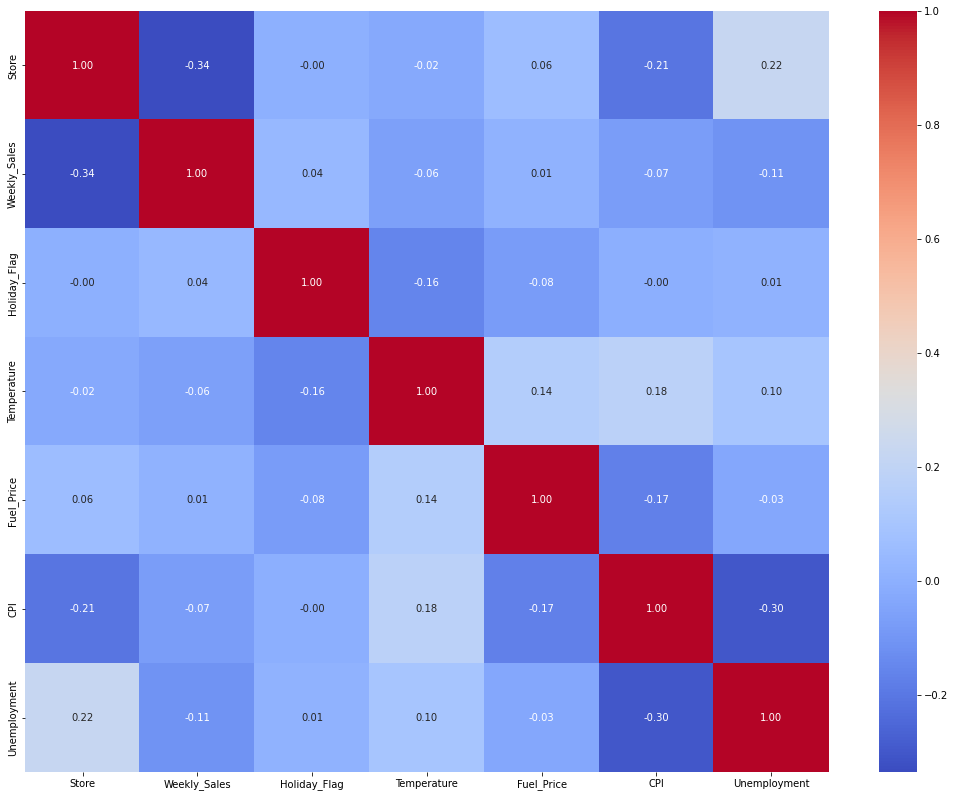

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


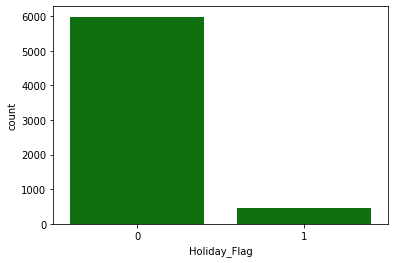

In [ ]:
sns.countplot(df.Holiday_Flag,color='green')

Text(0, 0.5, 'Weekly_Sales')

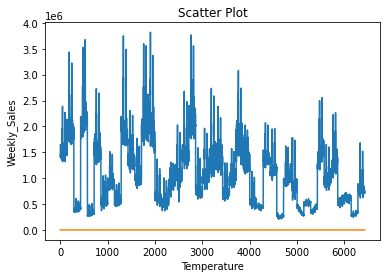

In [ ]:
plt.plot(df['Weekly_Sales'])
plt.plot(df['Temperature'])
plt.title("Scatter Plot")
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')

<BarContainer object of 6435 artists>

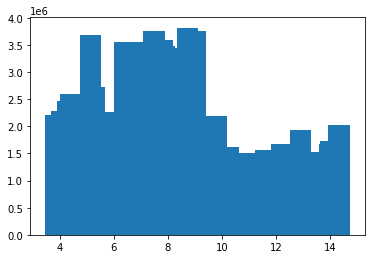

In [ ]:
#plt.figure(figsize=(12,13))
plt.bar(df['Unemployment'], df['Weekly_Sales'])


(array([1697., 1367., 1270., 1049.,  668.,  314.,   38.,   20.,    3.,
           9.]),
 array([ 209986.25,  570856.27,  931726.29, 1292596.31, 1653466.33,
        2014336.35, 2375206.37, 2736076.39, 3096946.41, 3457816.43,
        3818686.45]),
 <a list of 10 Patch objects>)

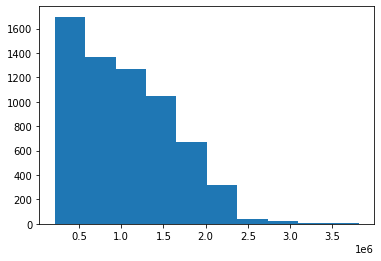

In [ ]:
plt.hist(df['Weekly_Sales'])

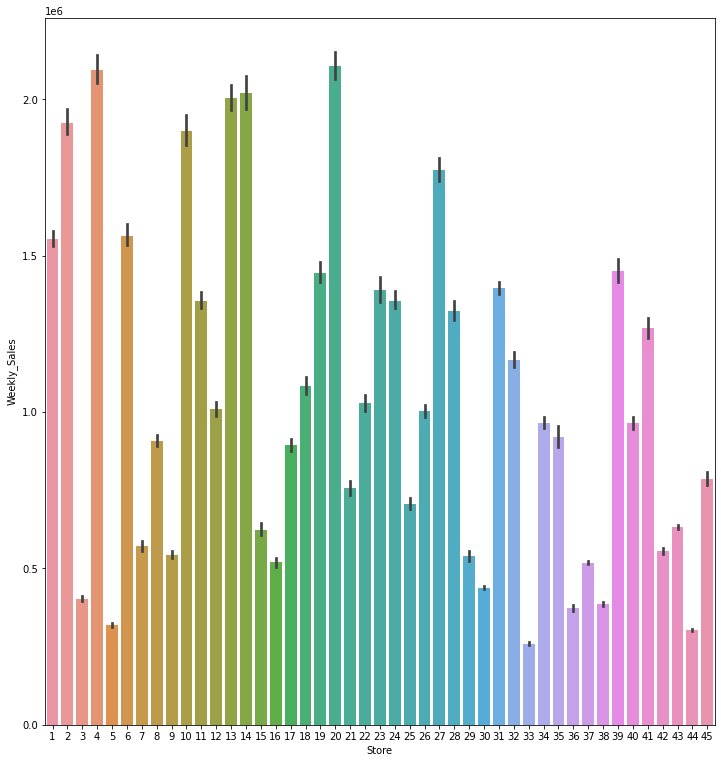

In [ ]:
plt.figure(figsize=(12,13))
sns.barplot(x='Store', y='Weekly_Sales', data=df,)
plt.show()

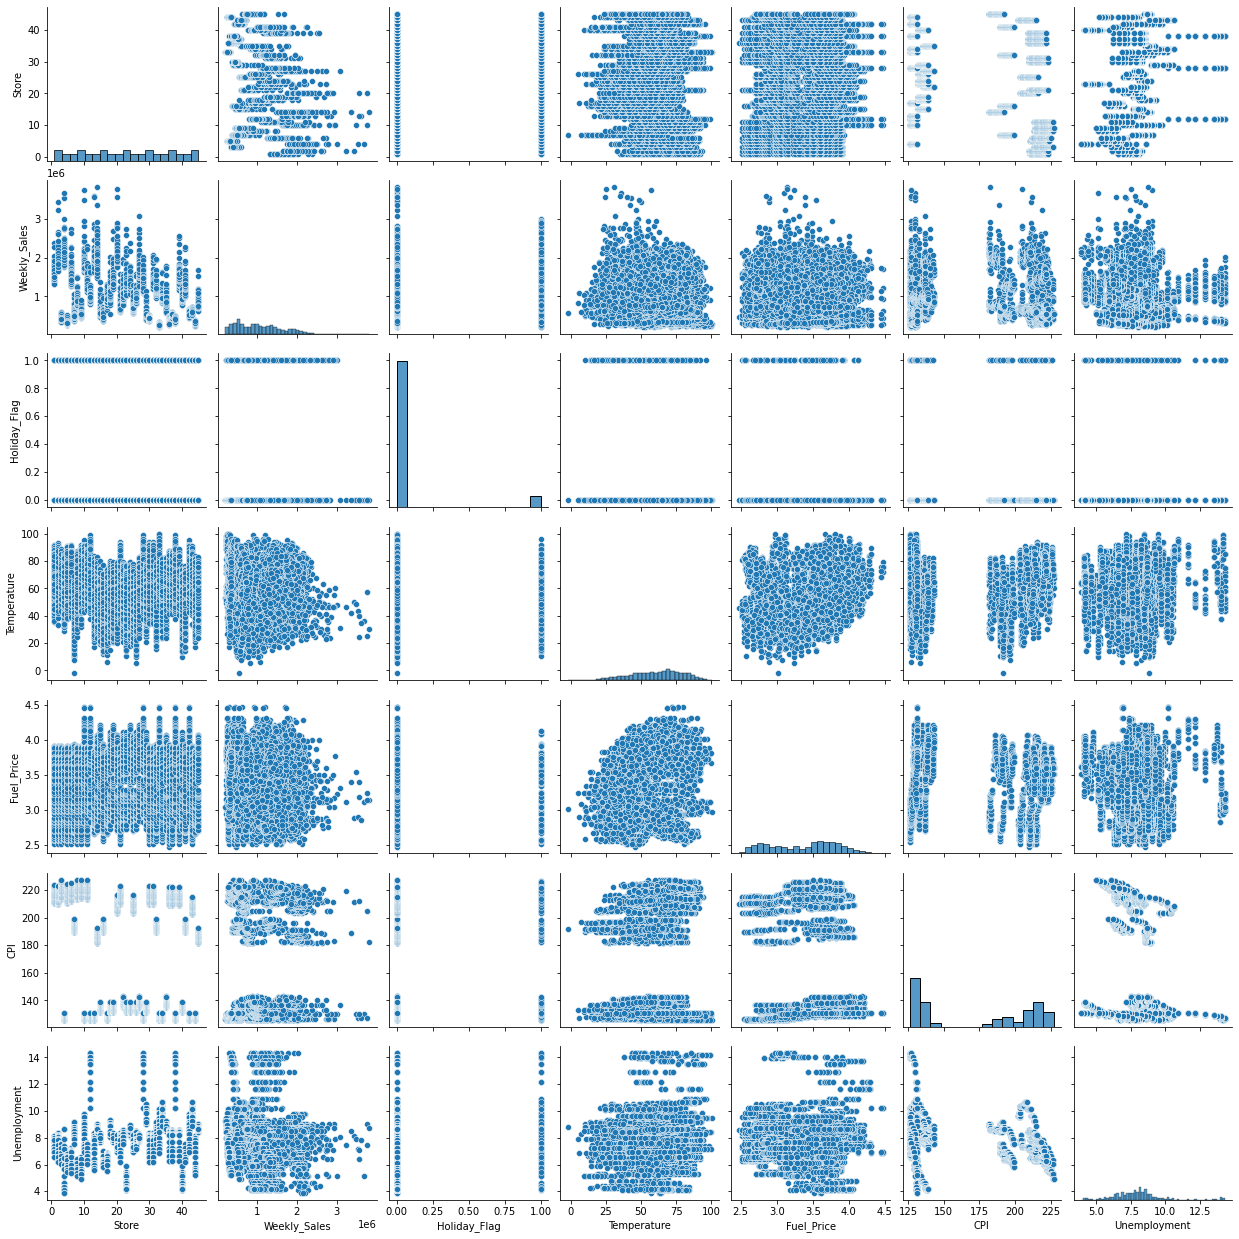

In [ ]:
sns.pairplot(data = df,)
plt.show()

In [ ]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


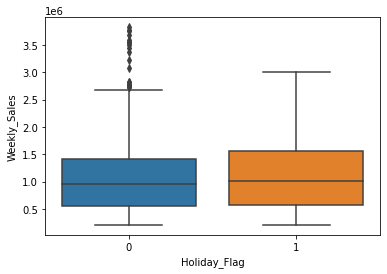

In [ ]:
sns.boxplot(df.Holiday_Flag, df.Weekly_Sales)
plt.show()

([<matplotlib.patches.Wedge at 0x7fbc9e97f430>,
 [Text(-0.25679386593526243, -1.0696059603508306, 'Non Special Holiday Week'),
  Text(0.3268284610531304, 1.361316699760068, 'Special Holiday Week')],
 [Text(-0.14006938141923403, -0.5834214329186348, '92.50%'),
  Text(0.2101040106770124, 0.8751321641314721, '7.50%')])

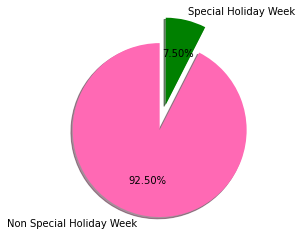

In [ ]:
df4 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['hotpink','green'])

<ipython-input-246-ba128f0b7fa9>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

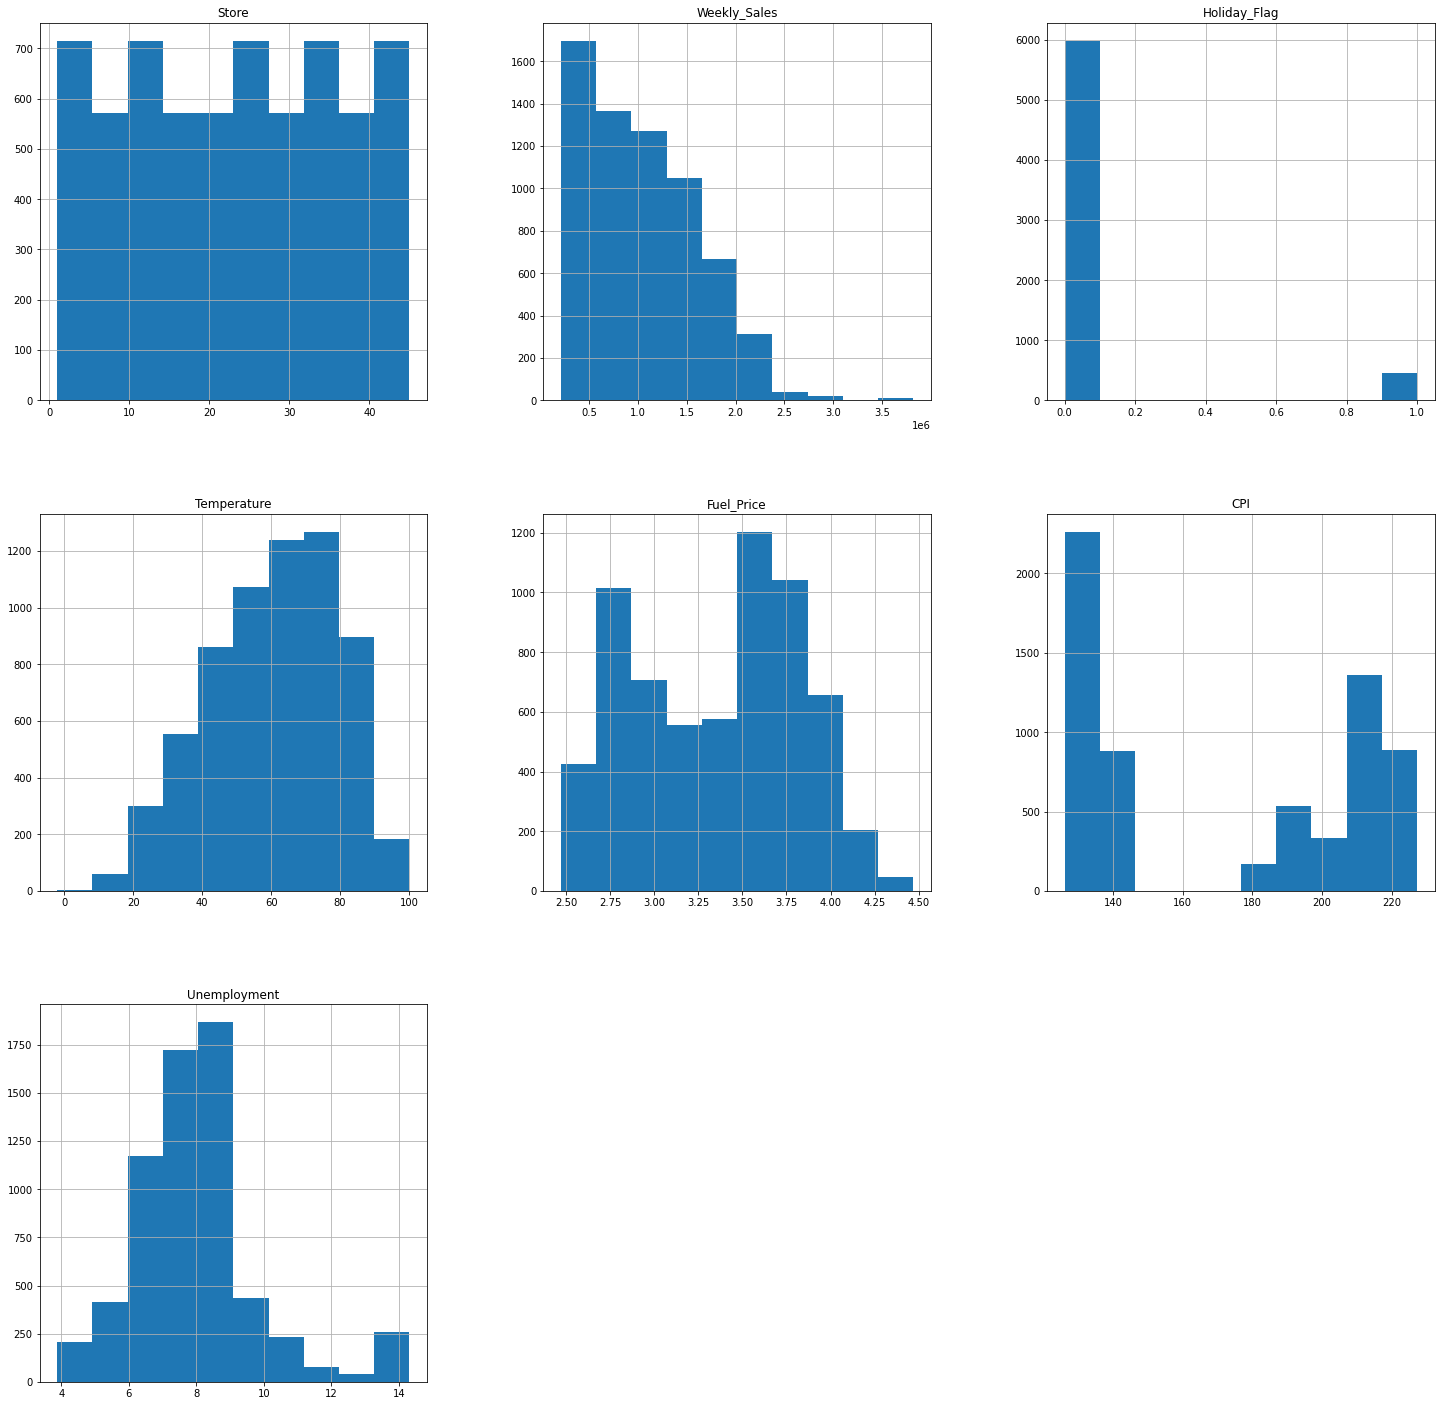

In [ ]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
df.hist(ax=ax)
plt.tight_layout

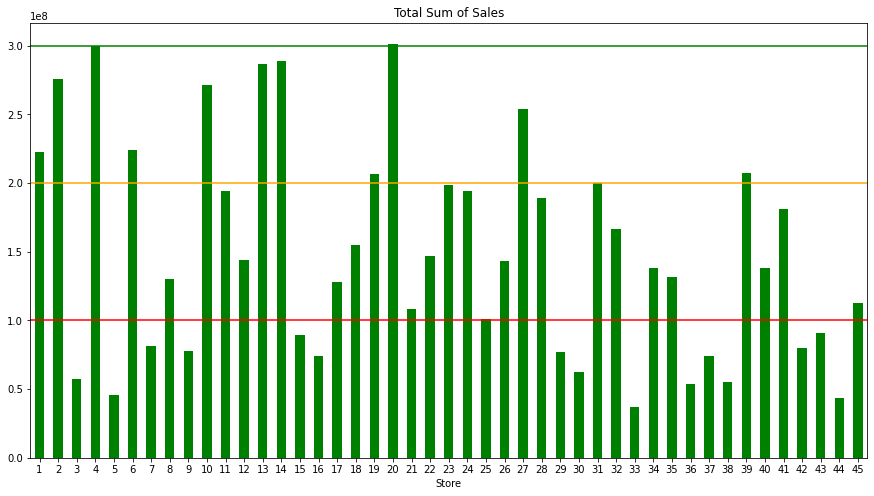

In [ ]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot(kind = 'bar',color = 'green')
plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=300000000,color = 'green')
plt.show()

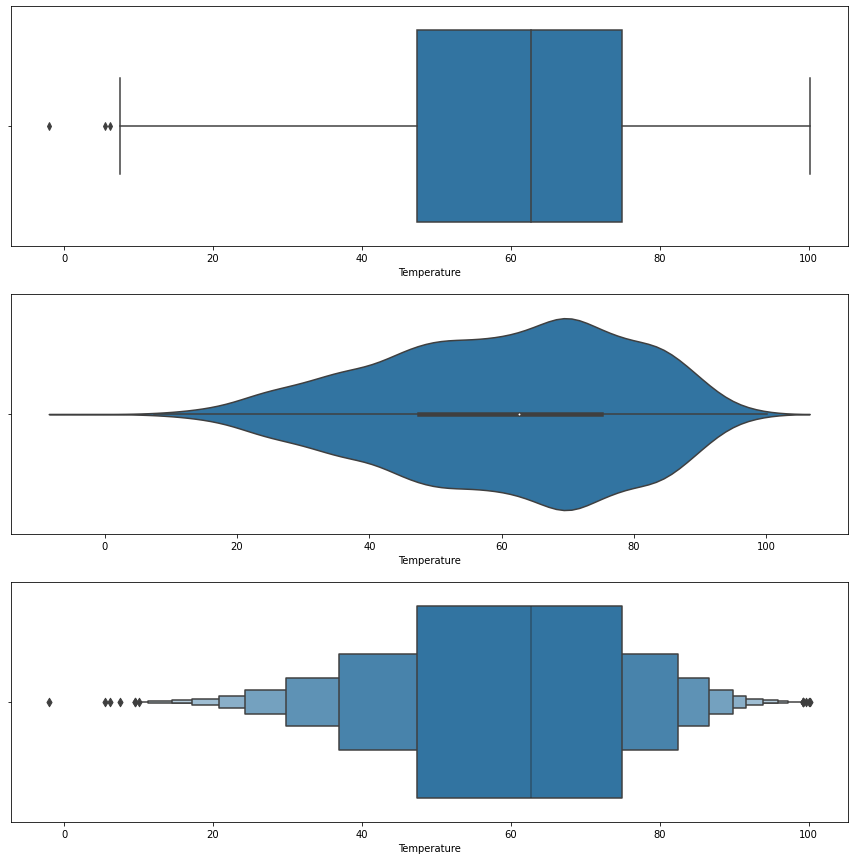

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))
sns.boxplot(x = df['Temperature'], ax=axs[0])
sns.violinplot(x = df['Temperature'], ax=axs[1])
sns.boxenplot(x = df['Temperature'], ax=axs[2])
plt.show()

## 3) Feature Engineering

Creating dummy variables for categorical data

In [ ]:
df_dummies = pd.get_dummies(df,columns=['Store','Holiday_Flag'])
print(df_dummies.columns.to_list())

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1']


In [ ]:
x = df_dummies.drop(['Weekly_Sales'],axis=1)
y = df_dummies.Weekly_Sales


In [ ]:
df.isnull()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0


Categorical imputation
If missing categorical column is found it is replaced with median in the column.


ii)Outlier detection and Handling :



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

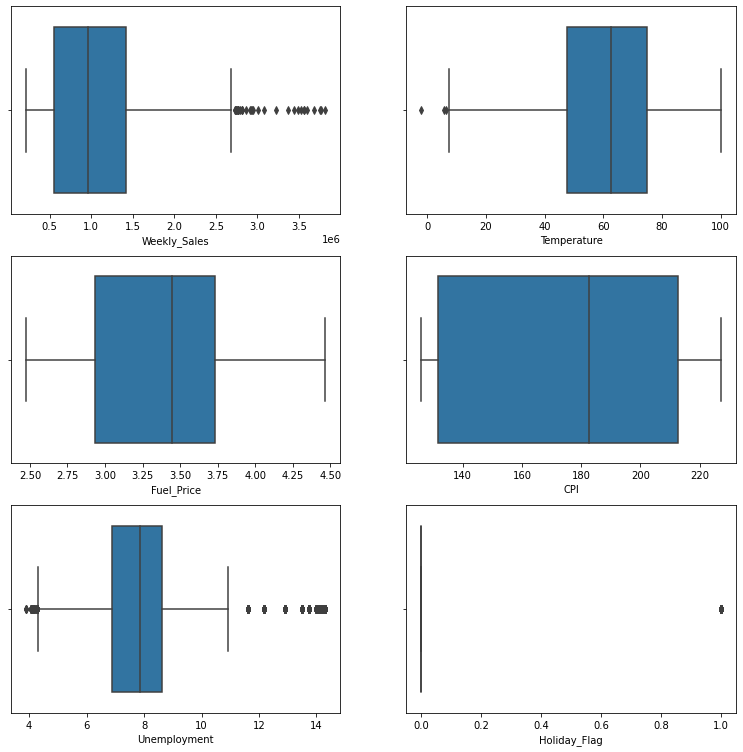

In [ ]:
# Finding the Outliers 
a = 1
plt.figure(figsize = (13,13))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment","Holiday_Flag"]:
     if a<=6:
        plt.subplot(3,2,a);
        a+=1
        sns.boxplot(df[i]);
        plt.xlabel(i);

Outliers are present in :

Weekly_Sales,Temperature,Fuel_Price,Unemployment

In [ ]:
# Gives the outliers index.
print(np.where(df['Weekly_Sales']>2.5))
print(np.where(df['Holiday_Flag']>0.8))
print(np.where(df['Temperature']<20))
print(np.where(df['Unemployment']>10))


(array([   0,    1,    2, ..., 6432, 6433, 6434]),)
(array([   1,   31,   42,   47,   53,   83,   94,   99,  105,  135,  144,
        174,  185,  190,  196,  226,  237,  242,  248,  278,  287,  317,
        328,  333,  339,  369,  380,  385,  391,  421,  430,  460,  471,
        476,  482,  512,  523,  528,  534,  564,  573,  603,  614,  619,
        625,  655,  666,  671,  677,  707,  716,  746,  757,  762,  768,
        798,  809,  814,  820,  850,  859,  889,  900,  905,  911,  941,
        952,  957,  963,  993, 1002, 1032, 1043, 1048, 1054, 1084, 1095,
       1100, 1106, 1136, 1145, 1175, 1186, 1191, 1197, 1227, 1238, 1243,
       1249, 1279, 1288, 1318, 1329, 1334, 1340, 1370, 1381, 1386, 1392,
       1422, 1431, 1461, 1472, 1477, 1483, 1513, 1524, 1529, 1535, 1565,
       1574, 1604, 1615, 1620, 1626, 1656, 1667, 1672, 1678, 1708, 1717,
       1747, 1758, 1763, 1769, 1799, 1810, 1815, 1821, 1851, 1860, 1890,
       1901, 1906, 1912, 1942, 1953, 1958, 1964, 1994, 2003, 2033, 2044

Removing the outliers :

i) Using IQR :

IQR is not affected by the extreme outliers .

In [ ]:
# Dropping outliers 
def treat_outliers():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(df[i],[0,0.25,0.50,0.75])
        iqr = x[3]-x[1]
        upper = x[3]+1.5*iqr
        lower = x[1]-1.5*iqr
        df[i] = np.where(df[i]>upper,upper,(np.where(df[i]<lower,lower,df[i])))
treat_outliers()
#outlayers removed

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

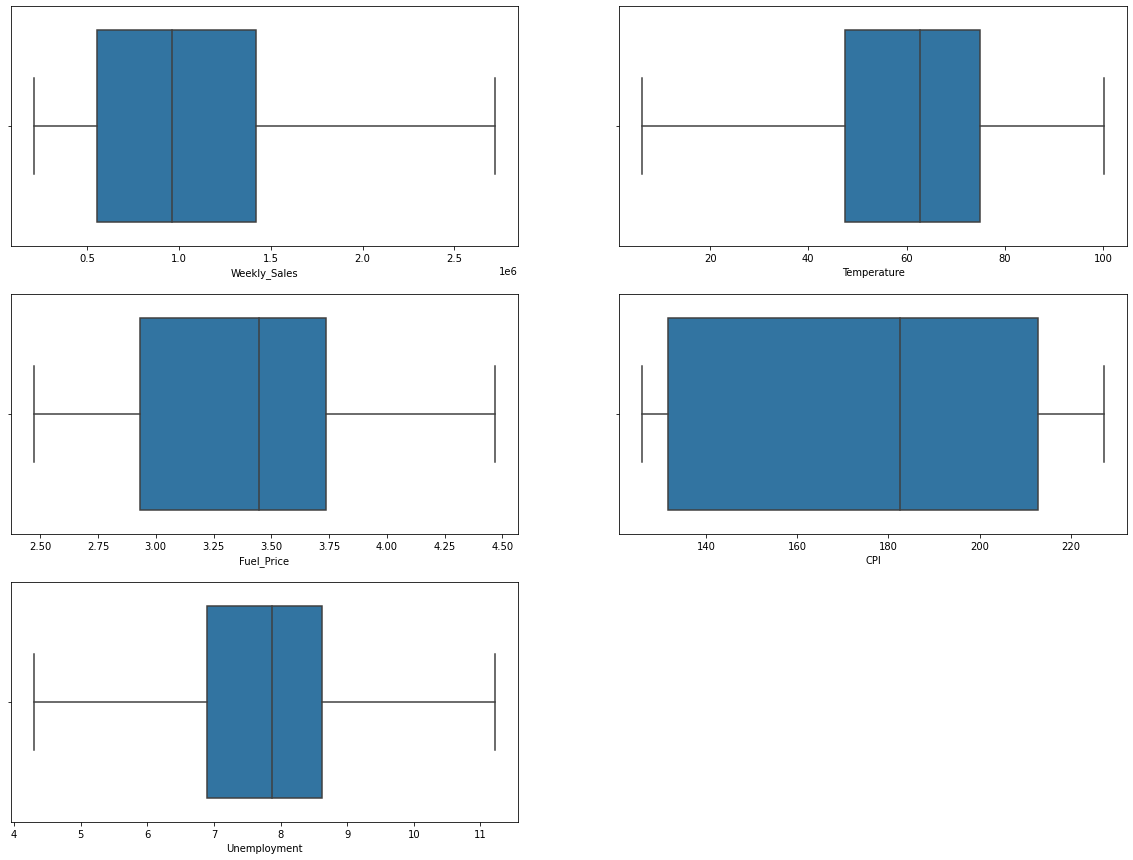

In [ ]:
# After removing the outliers 
pno = 1
plt.figure(figsize = (20,15))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i);

Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.

iii) Log Transform :



In [ ]:
df['log_Weeklysales'] = np.log(df['Weekly_Sales'])
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,log_Weeklysales
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862
...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,13.477481
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,13.505522
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,13.506897
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,13.484400


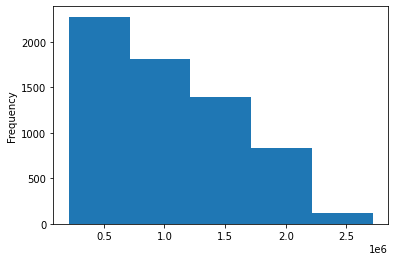

In [ ]:
df['Weekly_Sales'].plot.hist(bins = 5)

## 4) MODELLING
Linear Regression,Decision Tree, Random Forest, Lasso, Ridge and ElasticNet,Logistic Regression, Decision tree (classification ),Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

## Training with 80:20 Ratio

In [ ]:
df1 = pd.DataFrame(columns=["Model", "Accuracy for train","MSE for train","MAE for train","Accuracy for test","MSE for test","MAE for test"])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 42)

In [ ]:
def pred_model(model,x_train,y_train,x_test,y_test):
    c = model()
    c.fit(x_train,y_train)
    x_pred = c.predict(x_train)
    y_pred = c.predict(x_test)
    
    print(c)
    
    print("For Training Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_train, x_pred))
    print("MSE: ",mean_squared_error(y_train, x_pred))
    print("r2: ",r2_score(y_train, x_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

    print("")
    print("For Test Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("r2: ",r2_score(y_test, y_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
   # print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    #print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    #print(f'R2 : {r2_score(y_test,y_pred)}')
    
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    re = {}
    re["Model"] = c
    re["Accuracy for train"] = 100*(r2_score(y_train, x_pred))
    re["MSE for train"] = mean_squared_error(y_test, y_pred)
    re["MAE for train"] = mean_absolute_error(y_test, y_pred)
    re["Accuracy for test"] = 100*(r2_score(y_test, y_pred))
    re["MSE for test"] = mean_squared_error(y_test,y_pred)
    re["MAE for test"] = mean_absolute_error(y_test,y_pred)
    
    return re

LinearRegression()
For Training Data 
 --------------------------------
MAE:  91658.49791375292
MSE:  25483431377.687187
r2:  0.9197415767048237
RMSE:  159635.30742817261

For Test Data 
 --------------------------------
MAE:  91043.93576534577
MSE:  25498973840.474102
r2:  0.9208486340416606
RMSE:  159683.98116427992
Residual Analysis:


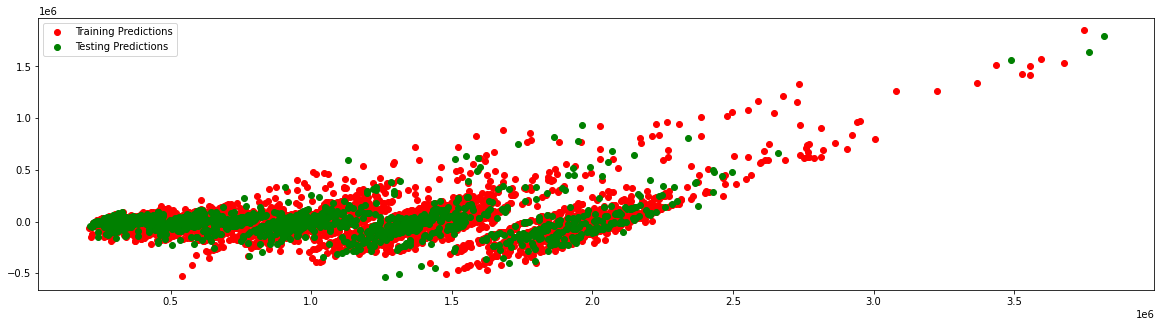

RandomForestRegressor()
For Training Data 
 --------------------------------
MAE:  28205.96945073814
MSE:  3089085128.8650856
r2:  0.9902711256505132
RMSE:  55579.53876081634

For Test Data 
 --------------------------------
MAE:  78583.07316891996
MSE:  23323692828.78271
r2:  0.9276009239375512
RMSE:  152720.96394661313
Residual Analysis:


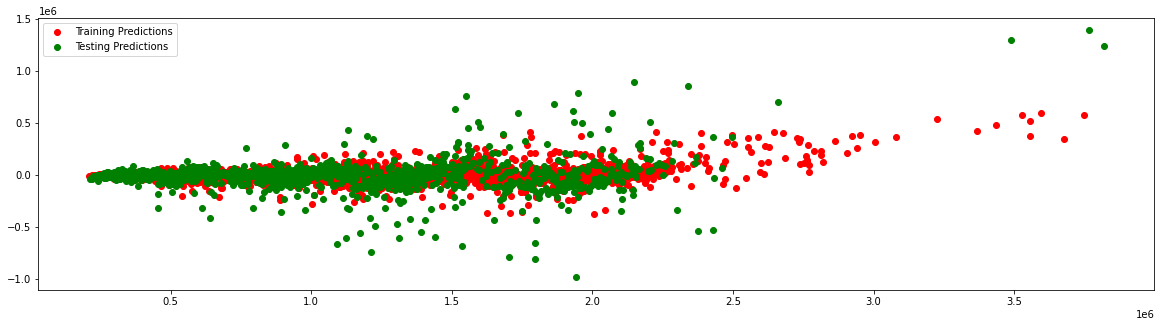

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.560e+13, tolerance: 1.635e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()
For Training Data 
 --------------------------------
MAE:  91598.52938923726
MSE:  25484221653.01745
r2:  0.9197390877836483
RMSE:  159637.78266130312

For Test Data 
 --------------------------------
MAE:  90998.7017327428
MSE:  25494684053.829407
r2:  0.9208619499685965
RMSE:  159670.5484860292
Residual Analysis:


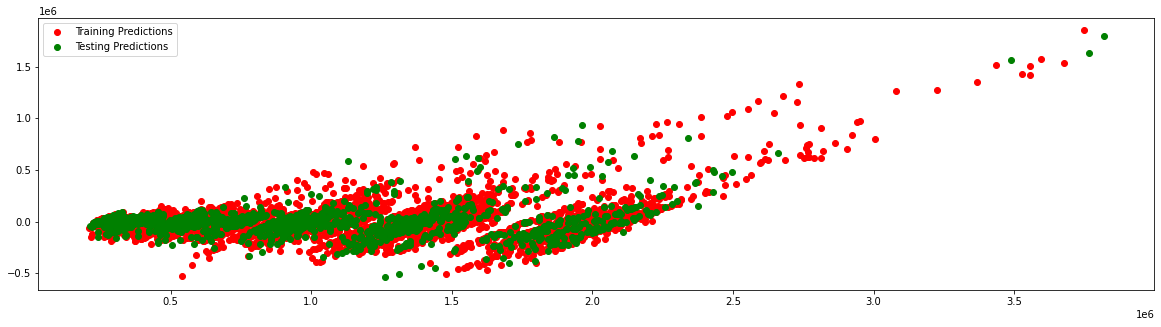

Ridge()
For Training Data 
 --------------------------------
MAE:  91259.13306522222
MSE:  25555855434.069073
r2:  0.9195134818110199
RMSE:  159861.98870922715

For Test Data 
 --------------------------------
MAE:  90637.27193754775
MSE:  25480789827.08348
r2:  0.9209050790385251
RMSE:  159627.0335096267
Residual Analysis:


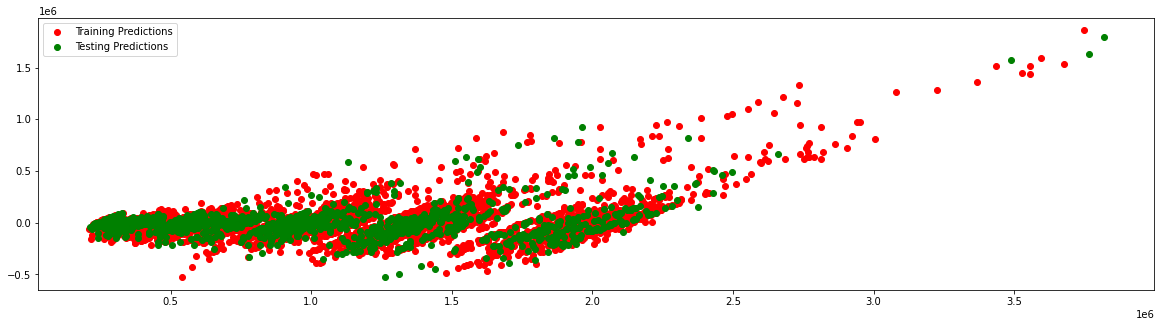

ElasticNet()
For Training Data 
 --------------------------------
MAE:  446462.93264128594
MSE:  285902294306.87006
r2:  0.09956916643360691
RMSE:  534698.3208379002

For Test Data 
 --------------------------------
MAE:  454902.5029152342
MSE:  291802023232.70123
r2:  0.09421732526292359
RMSE:  540187.0261610337
Residual Analysis:


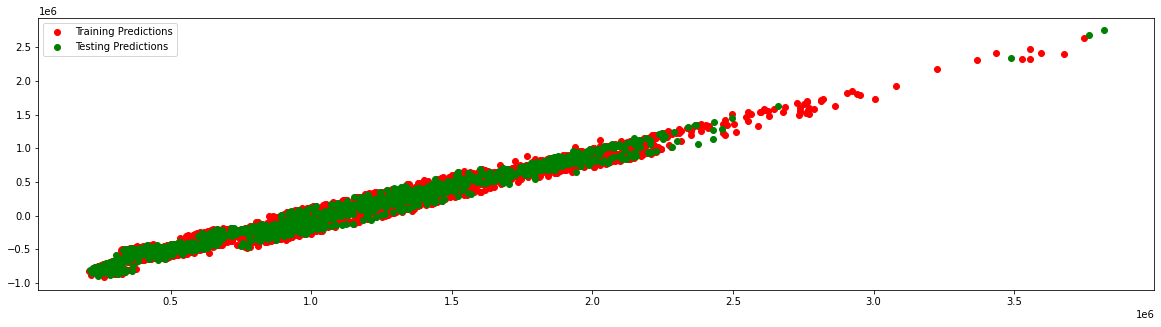

DecisionTreeRegressor()
For Training Data 
 --------------------------------
MAE:  0.0
MSE:  0.0
r2:  1.0
RMSE:  0.0

For Test Data 
 --------------------------------
MAE:  107632.49822843823
MSE:  49871658919.06369
r2:  0.8451933810847467
RMSE:  223319.63397575164
Residual Analysis:


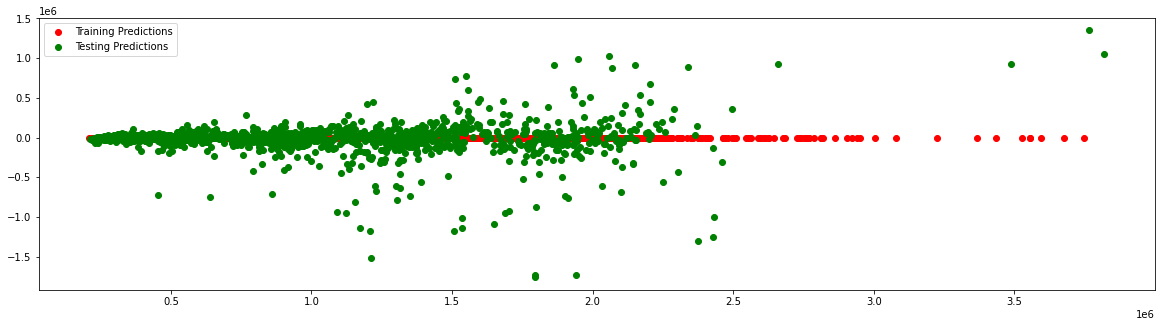

In [ ]:
#,KNeighborsRegressor,SVR
l = (LinearRegression,RandomForestRegressor,Lasso,Ridge,ElasticNet,DecisionTreeRegressor)

for i in l:
    re = pred_model(i, x_train,y_train,x_test,y_test)
    df1 = df1.append(re, ignore_index = True)

In [ ]:
n1 = df1.Model.values
n1[1]='RandomForest()'

In [ ]:
cprint('Results for 80:20 Ratio : ', 'green', attrs=['bold'])
df1

Results for 80:20 Ratio : 


,Model,Accuracy for train,MSE for train,MAE for train,Accuracy for test,MSE for test,MAE for test
0,LinearRegression(),91.974158,2.549897e+10,91043.935765,92.084863,2.549897e+10,91043.935765
1,RandomForest(),99.027113,2.332369e+10,78583.073169,92.760092,2.332369e+10,78583.073169
2,Lasso(),91.973909,2.549468e+10,90998.701733,92.086195,2.549468e+10,90998.701733
3,Ridge(),91.951348,2.548079e+10,90637.271938,92.090508,2.548079e+10,90637.271938
4,ElasticNet(),9.956917,2.918020e+11,454902.502915,9.421733,2.918020e+11,454902.502915
5,DecisionTreeRegressor(),100.000000,4.987166e+10,107632.498228,84.519338,4.987166e+10,107632.498228


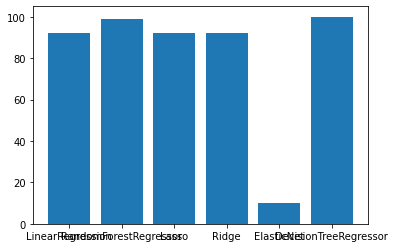

In [ ]:
import matplotlib.pyplot as plt
model = ['LinearRegression','RandomForestRegressor','Lasso','Ridge','ElasticNet','DecisionTreeRegressor']
acc = df1['Accuracy for train'].tolist()
plt.bar(model,acc)
plt.show()

##  Training with 70:30 Ratio

In [ ]:
df2 = pd.DataFrame(columns=["Model", "Accuracy for train","MSE for train","MAE for train","Accuracy for test","MSE for test","MAE for test"])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state = 42)

In [ ]:
def pred_model1(model,x_train,y_train,x_test,y_test):
    c = model()
    c.fit(x_train,y_train)
    x_pred = c.predict(x_train)
    y_pred = c.predict(x_test)
    
    print(c)
    
    print("For Training Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_train, x_pred))
    print("MSE: ",mean_squared_error(y_train, x_pred))
    print("r2: ",r2_score(y_train, x_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

    print("")
    print("For Test Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("r2: ",r2_score(y_test, y_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    re1 = {}
    re1["Model"] = c
    re1["Accuracy for train"] = 100*(r2_score(y_train, x_pred))
    re1["MSE for train"] = mean_squared_error(y_test, y_pred)
    re1["MAE for train"] = mean_absolute_error(y_test, y_pred)
    re1["Accuracy for test"] = 100*(r2_score(y_test, y_pred))
    re1["MSE for test"] = mean_squared_error(y_test,y_pred)
    re1["MAE for test"] = mean_absolute_error(y_test,y_pred)
    
    return re1

LinearRegression()
For Training Data 
 --------------------------------
MAE:  90743.42868339253
MSE:  25008670247.65213
r2:  0.9213101181612703
RMSE:  158141.29836210443

For Test Data 
 --------------------------------
MAE:  93555.63509062663
MSE:  26700103083.701454
r2:  0.9164892735831781
RMSE:  163401.66181438137
Residual Analysis:


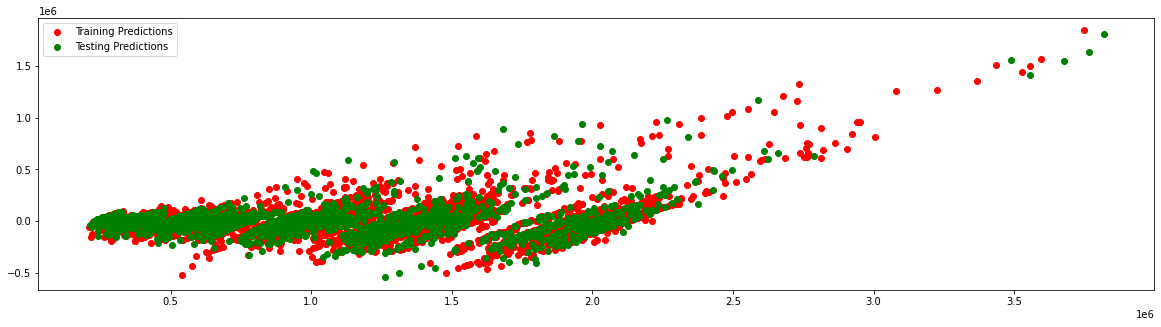

RandomForestRegressor()
For Training Data 
 --------------------------------
MAE:  28386.449065652738
MSE:  3107730950.2008667
r2:  0.990221512026181
RMSE:  55747.026379896415

For Test Data 
 --------------------------------
MAE:  77820.83564992233
MSE:  21439157534.943806
r2:  0.9329440933656638
RMSE:  146421.164914584
Residual Analysis:


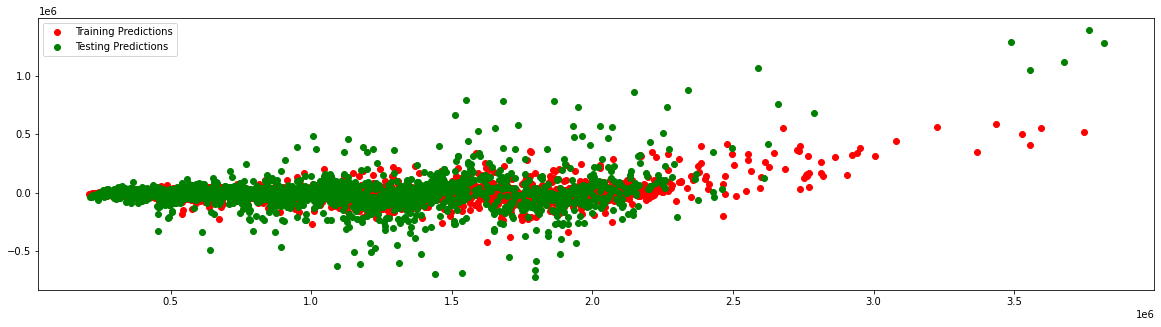

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.631e+13, tolerance: 1.431e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()
For Training Data 
 --------------------------------
MAE:  90692.61590922698
MSE:  25009330410.97218
r2:  0.9213080409547202
RMSE:  158143.38560613967

For Test Data 
 --------------------------------
MAE:  93508.17526692004
MSE:  26701146966.805447
r2:  0.9164860085981691
RMSE:  163404.85600741932
Residual Analysis:


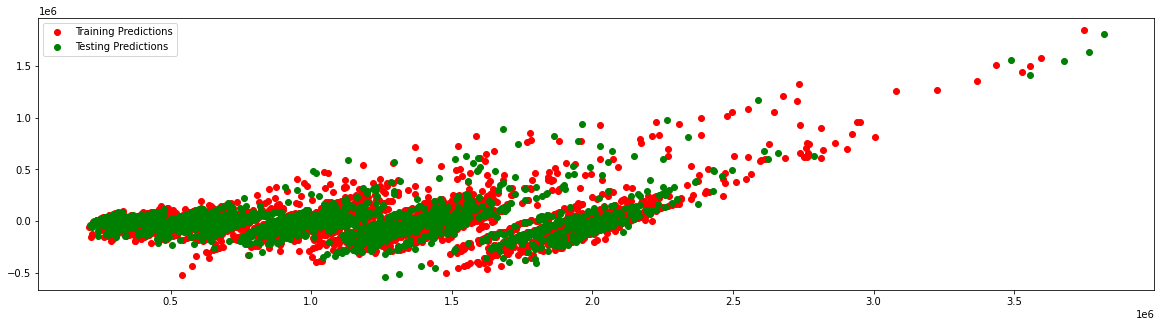

Ridge()
For Training Data 
 --------------------------------
MAE:  90395.53707184408
MSE:  25083064798.31058
r2:  0.9210760354074579
RMSE:  158376.3391365976

For Test Data 
 --------------------------------
MAE:  93085.19065616067
MSE:  26737664233.55581
r2:  0.9163717924296577
RMSE:  163516.55645088607
Residual Analysis:


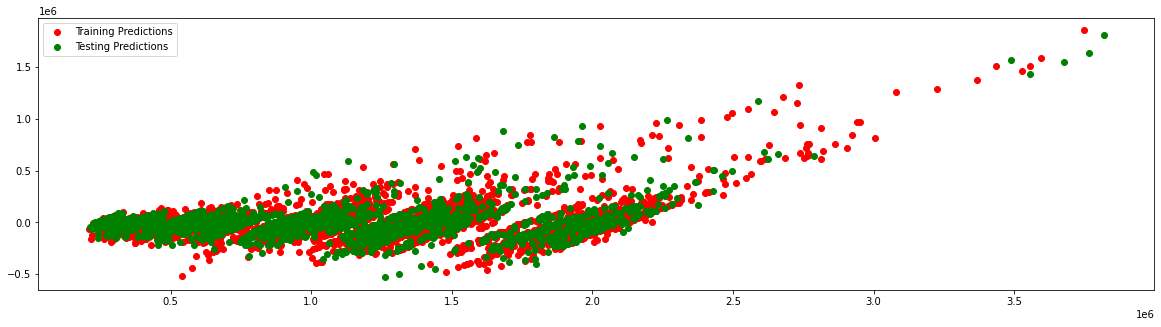

ElasticNet()
For Training Data 
 --------------------------------
MAE:  445973.75017603085
MSE:  285938634867.50665
r2:  0.10029293168979403
RMSE:  534732.3020610468

For Test Data 
 --------------------------------
MAE:  451691.05530624115
MSE:  289625955304.5144
r2:  0.09412806981219579
RMSE:  538169.076875023
Residual Analysis:


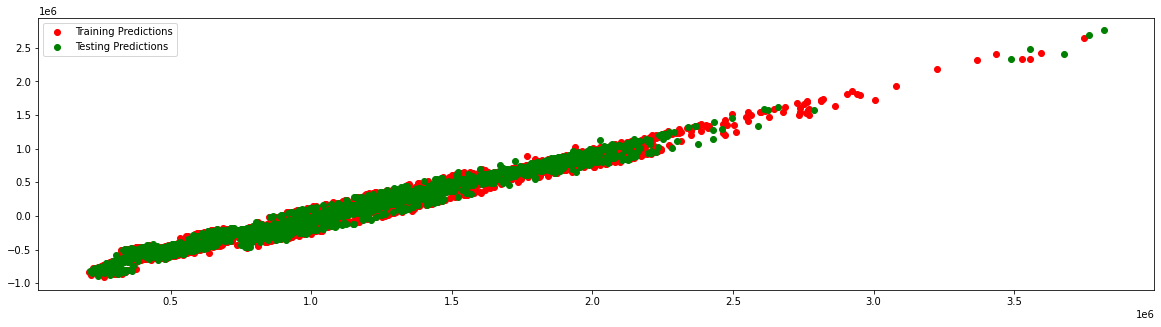

DecisionTreeRegressor()
For Training Data 
 --------------------------------
MAE:  0.0
MSE:  0.0
r2:  1.0
RMSE:  0.0

For Test Data 
 --------------------------------
MAE:  99282.40867426203
MSE:  39478328339.66777
r2:  0.8765224288823077
RMSE:  198691.54068472006
Residual Analysis:


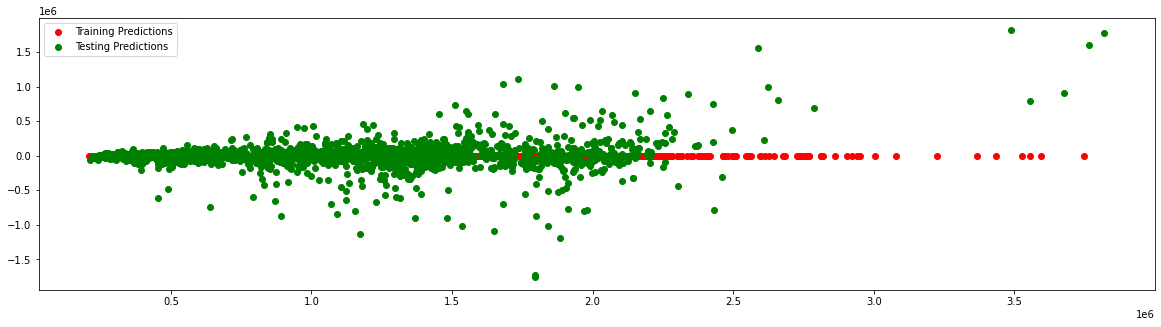

In [ ]:
l = (LinearRegression,RandomForestRegressor,Lasso,Ridge,ElasticNet,DecisionTreeRegressor)

for i in l:
    re1 = pred_model1(i, x_train,y_train,x_test,y_test)
    df2 = df2.append(re1, ignore_index = True)    

In [ ]:
n2 = df2.Model.values
n2[1]='RandomForest()'

In [ ]:
cprint('Results for 70:30 Ratio : ', 'green', attrs=['bold'])
df2

Results for 70:30 Ratio : 


,Model,Accuracy for train,MSE for train,MAE for train,Accuracy for test,MSE for test,MAE for test
0,LinearRegression(),92.131012,2.670010e+10,93555.635091,91.648927,2.670010e+10,93555.635091
1,RandomForest(),99.022151,2.143916e+10,77820.835650,93.294409,2.143916e+10,77820.835650
2,Lasso(),92.130804,2.670115e+10,93508.175267,91.648601,2.670115e+10,93508.175267
3,Ridge(),92.107604,2.673766e+10,93085.190656,91.637179,2.673766e+10,93085.190656
4,ElasticNet(),10.029293,2.896260e+11,451691.055306,9.412807,2.896260e+11,451691.055306
5,DecisionTreeRegressor(),100.000000,3.947833e+10,99282.408674,87.652243,3.947833e+10,99282.408674


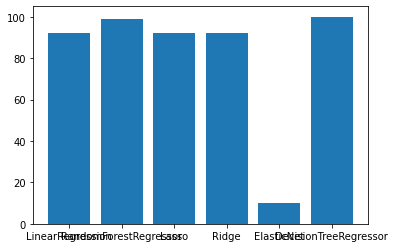

In [ ]:
acc1 = df2['Accuracy for train'].tolist()
plt.bar(model,acc1)
plt.show()

##  Training with 60:40 Ratio

In [ ]:
df3 = pd.DataFrame(columns=["Model", "Accuracy for train","MSE for train","MAE for train","Accuracy for test","MSE for test","MAE for test"])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.4, random_state = 42)

In [ ]:
def pred_model2(model,x_train,y_train,x_test,y_test):
    c = model()
    c.fit(x_train,y_train)
    x_pred = c.predict(x_train)
    y_pred = c.predict(x_test)
    
    print(c)
    
    print("For Training Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_train, x_pred))
    print("MSE: ",mean_squared_error(y_train, x_pred))
    print("r2: ",r2_score(y_train, x_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

    print("")
    print("For Test Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("r2: ",r2_score(y_test, y_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    re2 = {}
    re2["Model"] = c
    re2["Accuracy for train"] = 100*(r2_score(y_train, x_pred))
    re2["MSE for train"] = mean_squared_error(y_test, y_pred)
    re2["MAE for train"] = mean_absolute_error(y_test, y_pred)
    re2["Accuracy for test"] = 100*(r2_score(y_test, y_pred))
    re2["MSE for test"] = mean_squared_error(y_test,y_pred)
    re2["MAE for test"] = mean_absolute_error(y_test,y_pred)
    
    return re2

LinearRegression()
For Training Data 
 --------------------------------
MAE:  90745.17431678009
MSE:  25175116001.93018
r2:  0.9210406991926217
RMSE:  158666.68207891088

For Test Data 
 --------------------------------
MAE:  93304.34289804104
MSE:  26161117787.924522
r2:  0.9176563095268836
RMSE:  161743.98841355596
Residual Analysis:


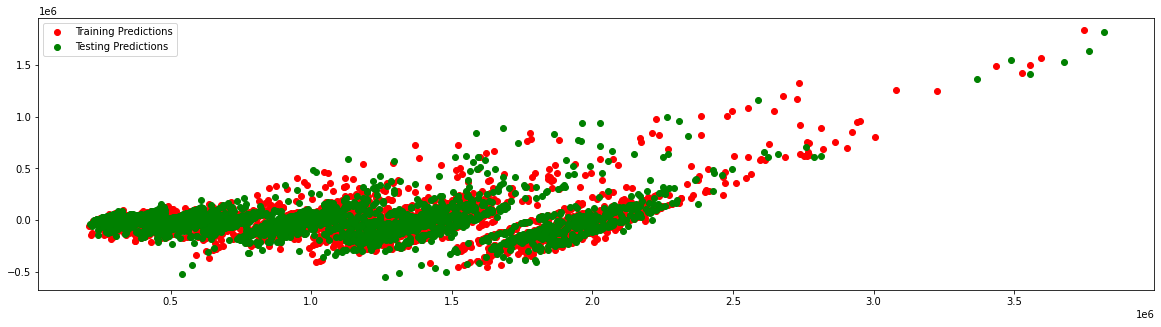

RandomForestRegressor()
For Training Data 
 --------------------------------
MAE:  28851.879538824156
MSE:  3261109786.548841
r2:  0.9897718465892171
RMSE:  57106.12739933291

For Test Data 
 --------------------------------
MAE:  81308.61170738151
MSE:  23220608597.22045
r2:  0.9269117389238818
RMSE:  152383.09813499806
Residual Analysis:


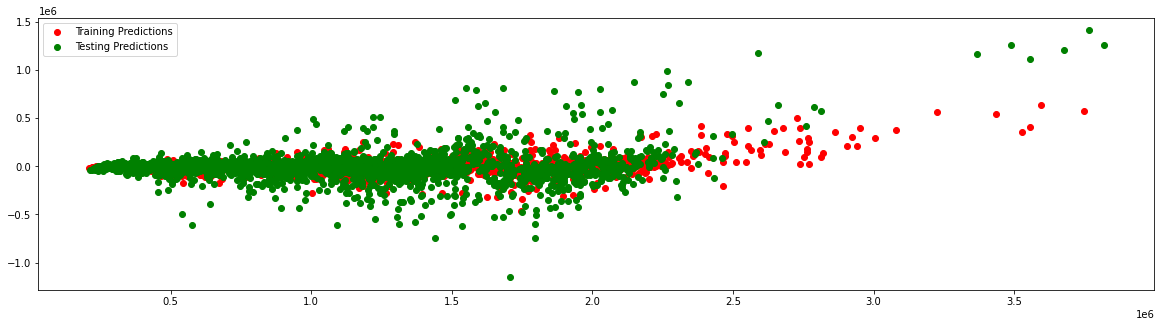

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.860e+13, tolerance: 1.231e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()
For Training Data 
 --------------------------------
MAE:  90687.86399437282
MSE:  25175851047.12882
r2:  0.9210383937949049
RMSE:  158668.99838068185

For Test Data 
 --------------------------------
MAE:  93264.932414794
MSE:  26161370821.451103
r2:  0.9176555130886518
RMSE:  161744.7706154703
Residual Analysis:


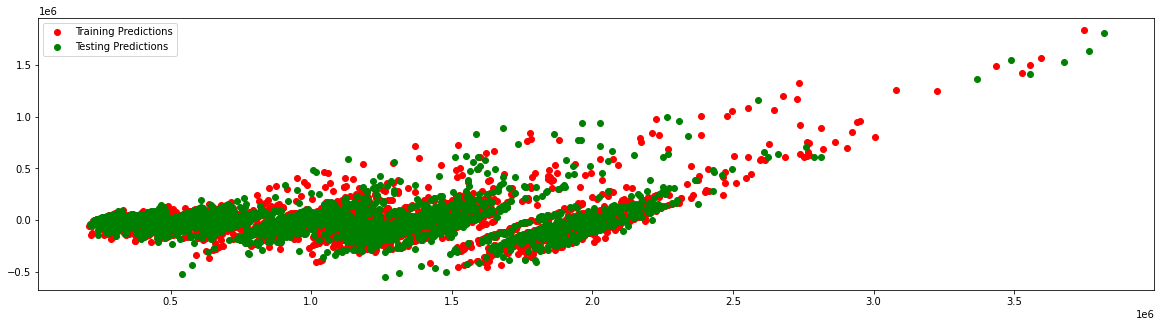

Ridge()
For Training Data 
 --------------------------------
MAE:  90334.99358703295
MSE:  25265959076.833775
r2:  0.920755778730804
RMSE:  158952.69446232668

For Test Data 
 --------------------------------
MAE:  92719.6115006269
MSE:  26142445331.492165
r2:  0.9177150822056851
RMSE:  161686.25585216624
Residual Analysis:


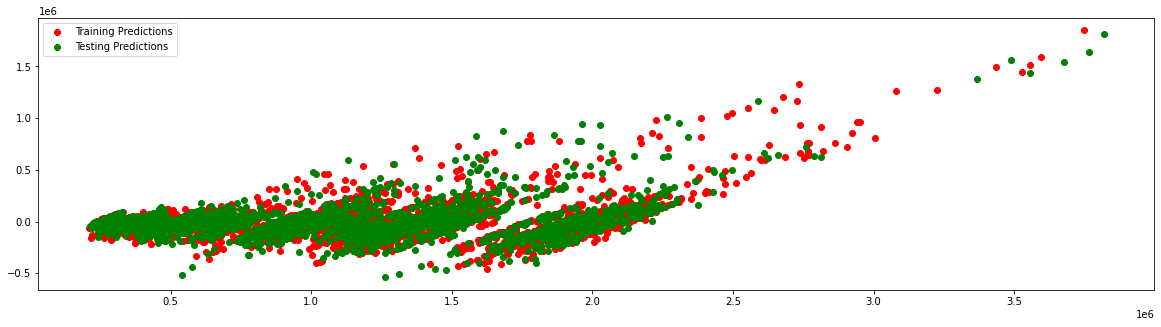

ElasticNet()
For Training Data 
 --------------------------------
MAE:  445299.4208567889
MSE:  287110801690.54724
r2:  0.09950491771345282
RMSE:  535827.212532685

For Test Data 
 --------------------------------
MAE:  450893.17040562455
MSE:  287047372457.0934
r2:  0.09650114416600186
RMSE:  535768.0211221023
Residual Analysis:


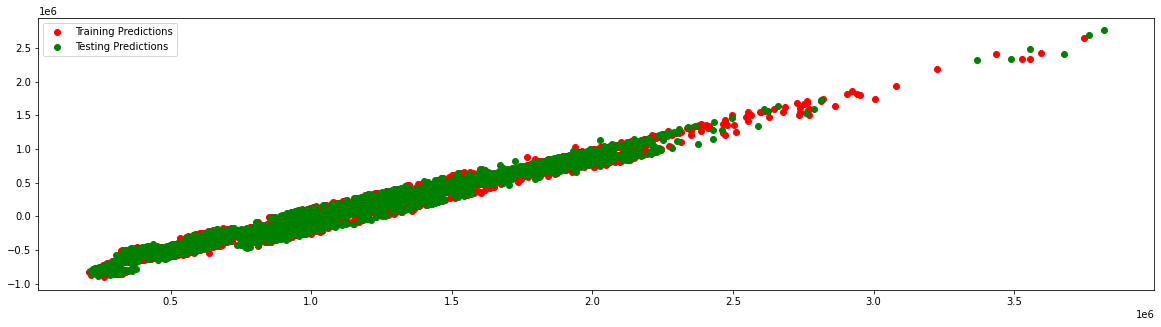

DecisionTreeRegressor()
For Training Data 
 --------------------------------
MAE:  0.0
MSE:  0.0
r2:  1.0
RMSE:  0.0

For Test Data 
 --------------------------------
MAE:  104220.25827894328
MSE:  40374004803.46225
r2:  0.8729203934768048
RMSE:  200932.83654858966
Residual Analysis:


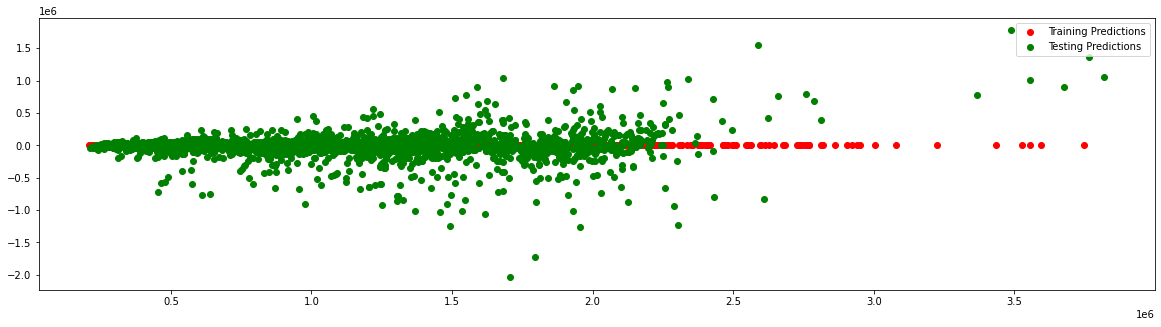

In [ ]:
l = (LinearRegression,RandomForestRegressor,Lasso,Ridge,ElasticNet,DecisionTreeRegressor)

for i in l:
    re2 = pred_model2(i, x_train,y_train,x_test,y_test)
    df3 = df3.append(re2, ignore_index = True)

In [ ]:
n3 = df3.Model.values
n3[1]='RandomForest()'

In [ ]:
cprint('Results for 60:40 Ratio : ', 'green', attrs=['bold'])
df3

Results for 60:40 Ratio : 


,Model,Accuracy for train,MSE for train,MAE for train,Accuracy for test,MSE for test,MAE for test
0,LinearRegression(),92.104070,2.616112e+10,93304.342898,91.765631,2.616112e+10,93304.342898
1,RandomForest(),98.977185,2.322061e+10,81308.611707,92.691174,2.322061e+10,81308.611707
2,Lasso(),92.103839,2.616137e+10,93264.932415,91.765551,2.616137e+10,93264.932415
3,Ridge(),92.075578,2.614245e+10,92719.611501,91.771508,2.614245e+10,92719.611501
4,ElasticNet(),9.950492,2.870474e+11,450893.170406,9.650114,2.870474e+11,450893.170406
5,DecisionTreeRegressor(),100.000000,4.037400e+10,104220.258279,87.292039,4.037400e+10,104220.258279


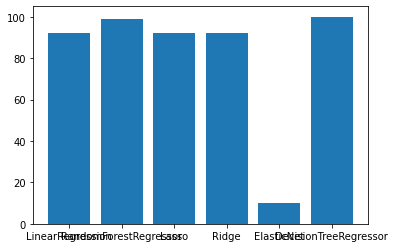

In [ ]:
acc2 = df3['Accuracy for train'].tolist()
plt.bar(model,acc2)
plt.show()

#### After comparing all the models with different test ratios, we get that 'RandomForest' with 70:30 ratio is giving us the best model with 93.12 accuracy.


#### So now we will try to improve it's accuracy further by tuning it's parameters

CONVERTING TO CLASSIFICATION PROBLEM

MODELS:

1) LOGISTIC REGRESSION

2) SUPPORT VECTOR MACHINE

3) DECISION TREE 

In [ ]:
from sklearn.svm import SVC
da = pd.read_csv("/content/Walmart.csv")
da['Year'] = da['Date'].apply(lambda x: x[-4:])
da['Month'] = da['Date'].apply(lambda x: x[3:5])

# Drop the original date column
da = da.drop('Date', axis=1)

In [ ]:
da

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,09
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


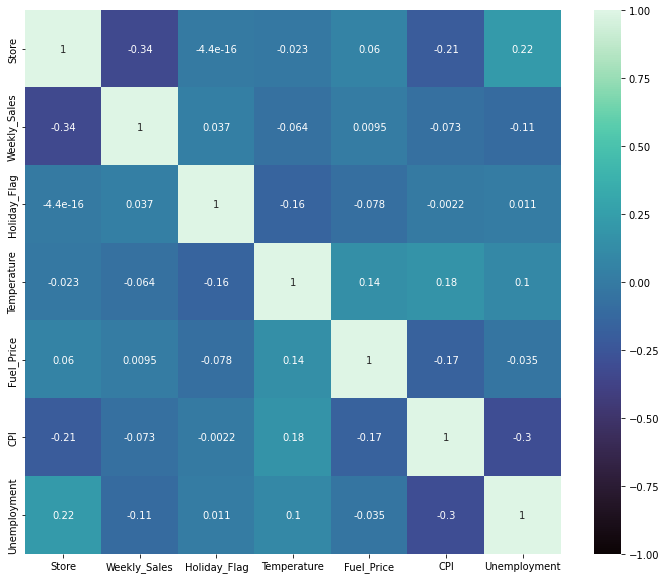

In [ ]:
corr = da.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, vmin = -1.0, cmap = 'mako')
plt.show()

Encoding Store Column

In [ ]:
pd.get_dummies(da['Store'], prefix = 'store')

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column, axis = 1)
    return df

In [ ]:
da = onehot_encode(da, column = 'Store', prefix = 'store')

In [ ]:
yy = da['Holiday_Flag'].copy()
xx = da.drop('Holiday_Flag', axis = 1).copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xx = scaler.fit_transform(xx)

In [ ]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, train_size = 0.7)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
log_model = LogisticRegression()
svm_model = SVC()
dec_model = DecisionTreeClassifier()

In [ ]:
log_model.fit(xx_train, yy_train)
svm_model.fit(xx_train, yy_train)
dec_model.fit(xx_train, yy_train)

print("Models trained.")

Models trained.


In [ ]:
print("   Logistic Regression Accuracy:", log_model.score(xx_test, yy_test))
print("Support Vector Machine Accuracy:", svm_model.score(xx_test, yy_test))
print("         Decision Tree Accuracy:", dec_model.score(xx_test, yy_test))

   Logistic Regression Accuracy: 0.9249093733816676
Support Vector Machine Accuracy: 0.92594510616261
         Decision Tree Accuracy: 0.9502848265147592


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

### Hyperparameter tuning

In [ ]:
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

#### Getting the best parameters

In [ ]:
print ('Random grid: ', random_grid, '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}  



#### Using the best parameters obtained in our model and getting the accuracy

In [ ]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
randmf.fit( x_train, y_train) 

x_pred = randmf.predict(x_train)
y_pred = randmf.predict(x_test)

For Training Data 
 --------------------------------
MAE:  27869.945257627547
MSE:  2875726216.179033
r2:  0.9909805646446461
RMSE:  53625.798047013086

For Test Data 
 --------------------------------
MAE:  76780.35640062159
MSE:  20333256874.76465
r2:  0.9359998519949014
RMSE:  142594.72947751137
Residual Analysis:


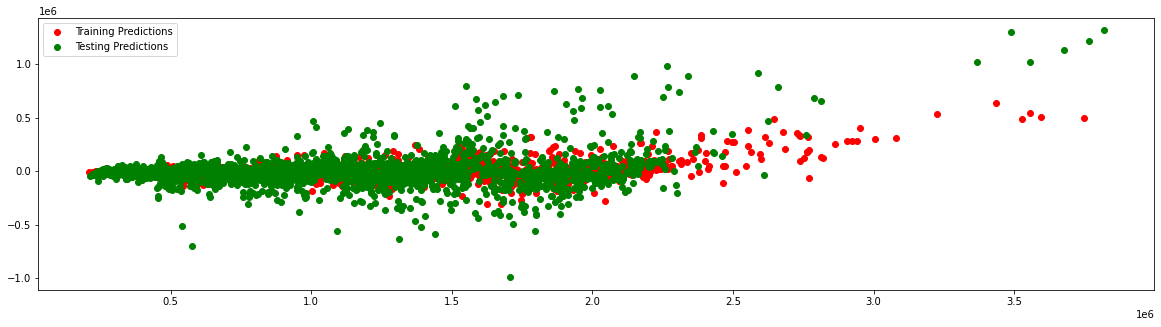

In [ ]:
print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, x_pred))
print("MSE: ",mean_squared_error(y_train, x_pred))
print("r2: ",r2_score(y_train, x_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

print("")
print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("r2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
print("Residual Analysis:")
plt.figure(figsize = (20,5))
plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
plt.legend()
plt.show()

### So, our accuracy has improved slightly after hyperparameter tuning from 93.13 to 93.55

### Hence, we will take this as our final model for further prediction

## Deployment

In [ ]:
tempe=input("Temparature : ")
fu = input("Fuel_Price : ")
cp = input("CPI: ")
un = input("Unemployment : ")
print("Is it a holiday :")
holi_0 = int(input("For No-1, Yes-0 : "))
holi_1 = int(input("For No-0, Yes-1 : "))
store=int(input("Enter the store no (1-45): "))
l1=['Store_0','Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 
    'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12',
    'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18',
    'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 
    'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33',
    'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 
    'Store_43', 'Store_44', 'Store_45']

value = l1[store]  

df13 = pd.DataFrame(columns = ['Fuel_Price', 'CPI', 'Unemployment', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1'])
data = {value:1}
df13 = df13.append(data,ignore_index = True)
df13['Temparature']=tempe
df13['Fuel_Price']=fu
df13['CPI']=cp
df13['Unemployment']=un
df13['Holiday_Flag_0']=holi_0
df13['Holiday_Flag_1']=holi_1

df13 = df13.fillna(0)
df13

Temparature : 1
Fuel_Price : 1
CPI: 1
Unemployment : 1
Is it a holiday :
For No-1, Yes-0 : 1
For No-0, Yes-1 : 1
Enter the store no (1-45): 1


,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_0,Holiday_Flag_1,Temparature
0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1


In [ ]:
randmf.predict(df13)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Temparature
Feature names seen at fit time, yet now missing:
- Temperature

  warnings.warn(message, FutureWarning)


array([1042141.2926])

In [ ]:
print("So the weekly sales for store 1 on a regular day is  : ",randmf.predict(df13))

So the weekly sales for store 1 on a regular day is  :  [1042141.2926]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Temparature
Feature names seen at fit time, yet now missing:
- Temperature

  warnings.warn(message, FutureWarning)


## Conclusion

So our dataset was labelled and our problem statement was of prediction, hence we have used different supervised learning algorithms used for prediction.

All the algorithms used in this project are : 
- Linear Regression
- Linear Regression : Lasso
- Linear Regression : Ridge
- Linear Regression : ELasticNet
- Decision Tree
- Random Forest
- Logistic Regression
- Support Vector Machine 

Also we have used three different train-test ratio for training our model.
And the best model that we obtained was 'RandomForest' with 70:30 ratio and with 93.145 accuracy. 
Also after tuning our model our accuracy further improved from 93.13 to 93.55.

In the end we have created a user-input deployment and predicted the output by the same.

--------------------------------